In [53]:
import numpy as np

neural_responses = np.loadtxt(r'/content/NeuralResponses_S1.txt', delimiter=',', skiprows=1)
category_vectors = np.loadtxt(r'/content/CategoryVectors.txt', delimiter=',', skiprows=1)



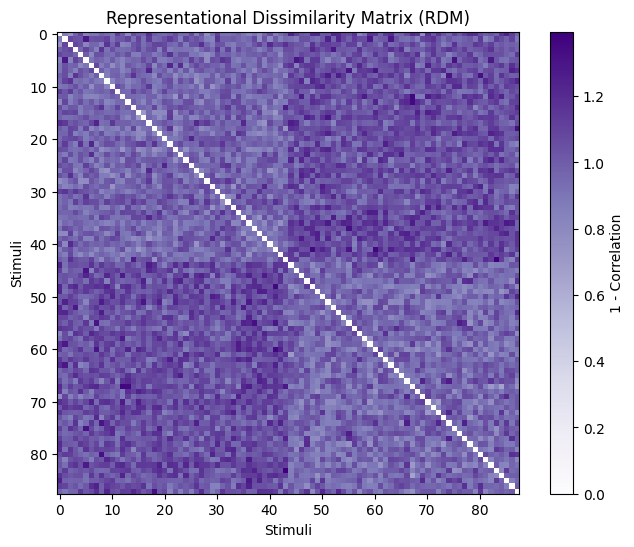

In [54]:
import matplotlib.pyplot as plt

n_stimuli = neural_responses.shape[0]
rdm = np.zeros((n_stimuli, n_stimuli))

for i in range(n_stimuli):
    for j in range(n_stimuli):
        r = np.corrcoef(neural_responses[i], neural_responses[j])[0, 1]
        rdm[i, j] = 1 - r

plt.figure(figsize=(8, 6))
plt.imshow(rdm, cmap='Purples', interpolation='nearest')
plt.colorbar(label='1 - Correlation')
plt.title('Representational Dissimilarity Matrix (RDM)')
plt.xlabel('Stimuli')
plt.ylabel('Stimuli')
plt.show()


In [55]:
from scipy.stats import ttest_ind

animacy_labels = category_vectors[:, 0]

same_animacy = []
different_animacy = []

for i in range(n_stimuli):
    for j in range(i + 1, n_stimuli):
        if animacy_labels[i] == animacy_labels[j]:
            same_animacy.append(rdm[i, j])
        else:
            different_animacy.append(rdm[i, j])

t_stat, p_value = ttest_ind(same_animacy, different_animacy)
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: -31.11698294231438, P-value: 1.0642378190174183e-189


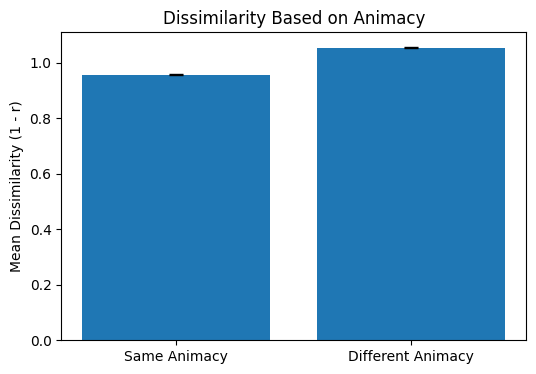

In [56]:
import numpy as np
import matplotlib.pyplot as plt

same_mean = np.mean(same_animacy)
diff_mean = np.mean(different_animacy)
same_sem = np.std(same_animacy) / np.sqrt(len(same_animacy))
diff_sem = np.std(different_animacy) / np.sqrt(len(different_animacy))

plt.figure(figsize=(6, 4))
plt.bar(['Same Animacy', 'Different Animacy'], [same_mean, diff_mean],
        yerr=[same_sem, diff_sem], capsize=5)
plt.ylabel('Mean Dissimilarity (1 - r)')
plt.title('Dissimilarity Based on Animacy')
plt.show()



In [57]:
import numpy as np

behavioral_rdm = np.genfromtxt(r'/content/BehaviourRDM (1).csv', delimiter=',', skip_header=1)

if behavioral_rdm.shape != rdm.shape:
    min_rows = min(rdm.shape[0], behavioral_rdm.shape[0])
    min_cols = min(rdm.shape[1], behavioral_rdm.shape[1])
    rdm = rdm[:min_rows, :min_cols]
    behavioral_rdm = behavioral_rdm[:min_rows, :min_cols]

rdm_flat = rdm.flatten()
behavioral_rdm_flat = behavioral_rdm.flatten()

full_corr = np.corrcoef(rdm_flat, behavioral_rdm_flat)[0, 1]

animate_indices = np.where(animacy_labels == 1)[0]
inanimate_indices = np.where(animacy_labels == 0)[0]

animate_rdm = rdm[np.ix_(animate_indices, animate_indices)]
animate_behav_rdm = behavioral_rdm[np.ix_(animate_indices, animate_indices)]
animate_corr = np.corrcoef(animate_rdm.flatten(), animate_behav_rdm.flatten())[0, 1]

inanimate_rdm = rdm[np.ix_(inanimate_indices, inanimate_indices)]
inanimate_behav_rdm = behavioral_rdm[np.ix_(inanimate_indices, inanimate_indices)]
inanimate_corr = np.corrcoef(inanimate_rdm.flatten(), inanimate_behav_rdm.flatten())[0, 1]

print(f"Full correlation: {full_corr}")
print(f"Animate correlation: {animate_corr}")
print(f"Inanimate correlation: {inanimate_corr}")


Full correlation: 0.03482953214377098
Animate correlation: 0.008909273486116658
Inanimate correlation: 0.06918168363285146
